1. A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.
Please assist the consultant in the area of statistical analysis by doing this;

In [1]:
import pandas as pd
#load data
df_a = pd.read_csv("./ingredient.csv")
df_a

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


In [2]:
#check null
df_a[df_a.isnull().any(axis=1)]

,a,b,c,d,e,f,g,h,i


  - a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

In [4]:
#summary
summary_df = pd.concat([df_a.mean(), df_a.var()],axis=1)
summary_df.columns = ["Mean", "Variance"]
summary_df

,Mean,Variance
a,1.518365,0.000009
b,13.407850,0.666841
c,2.684533,2.080540
d,1.444907,0.249270
e,72.650935,0.599921
f,0.497056,0.425354
g,8.956963,2.025366
h,0.175047,0.247227
i,0.057009,0.009494


In [5]:
#how frequent each additives is used
for col in df_a.columns:
  print(f"Additive {col} is used {len(df_a[df_a[col]!=0])}/{len(df_a)}")

Additive a is used 214/214
Additive b is used 214/214
Additive c is used 172/214
Additive d is used 214/214
Additive e is used 214/214
Additive f is used 184/214
Additive g is used 214/214
Additive h is used 38/214
Additive i is used 70/214


From the summary above we can know that additive a has the most stable of amount usage in the formulations, since it has a near zero variance. Moreover Additives a,b,d,e,g is used 100% of the times meaning they are base of the formula, while the others (c,f,h,i) are change in different variations for different combinations.

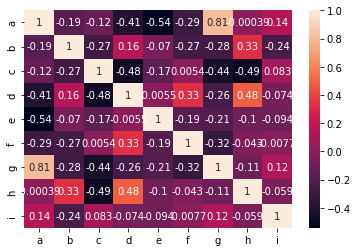

In [8]:
#correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df_a.corr()
sns.heatmap(corr_df, annot=True)
plt.show()

From the results above, we can separate the additives into 5 categories:

1. Strong positive correlation:
  - (a,g)
2. Weak positive correlation:
  - (b,h), (d,f), (d,h)
3. Weak negative correlation:
  - (a,f), (b,c), (b,f), (b,g), (b,i), (d,g), (f,g)
4. Strong negative correlation:
  - (a,e), (a,d), (c,d), (c,g), (c,h)

- b. A graphical analysis of the additives, including a distribution study.

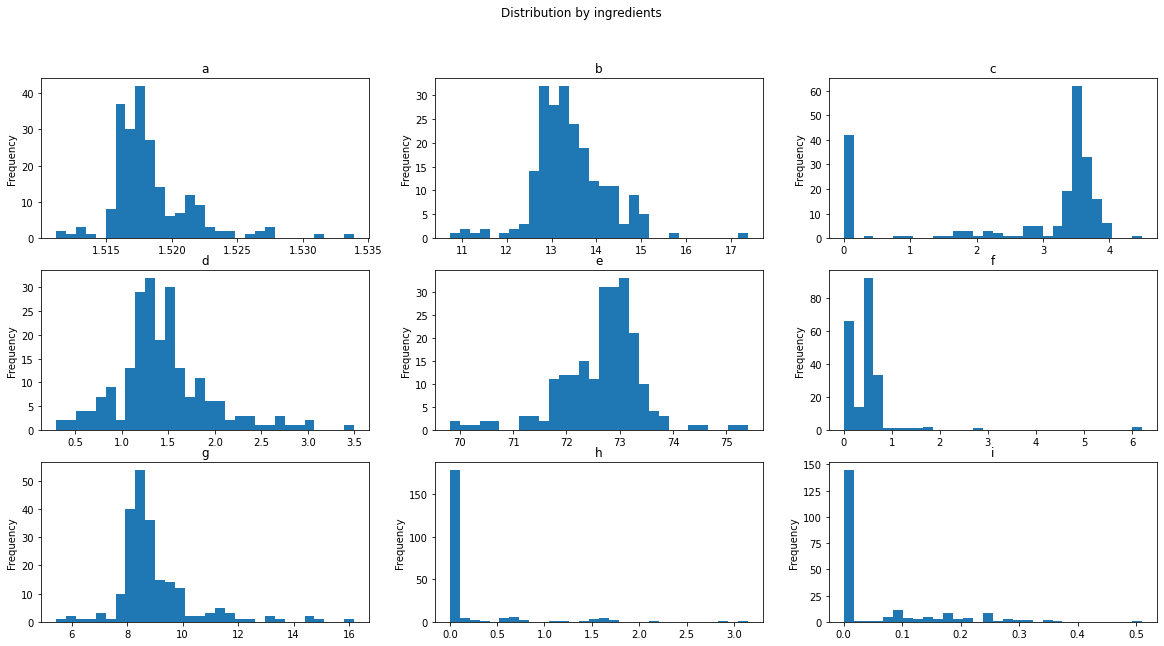

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
for n, col in enumerate(df_a.columns):
    i = n // 3
    j = n % 3
    df_a[col].plot(kind='hist', bins=30, ax=ax[i, j], subplots=True)
    ax[i, j].title.set_text(col)
plt.suptitle("Distribution by ingredients")
plt.show()

From the histogram we can see which are the most use portion of a given additive in different formulas. A few additives like f,h,i has high 0 frequency, meaning they might be experimental formulas.

- c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

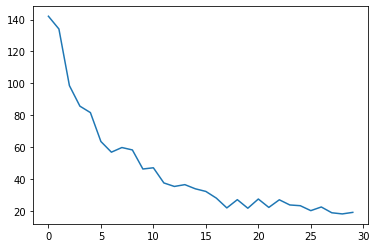

In [ ]:
from sklearn.cluster import KMeans

kmax = 30
sse = []
for k in range(1, kmax+1):
  kmeans = KMeans(n_clusters=k).fit(df_a.values)
  centroids = kmeans.cluster_centers_
  pred_clusters = kmeans.predict(df_a.values)
  curr_sse = 0
  for i in range(len(df_a.values)):
    curr_center = centroids[pred_clusters[i]]
    curr_sse += (df_a.values[i, 0] - curr_center[0]) ** 2 + (df_a.values[i, 1] - curr_center[1]) ** 2
  sse.append(curr_sse)
plt.plot(sse)

After the test seems like 17 is a good choice of K for K-means since the sum of square errors does not reduce as much.

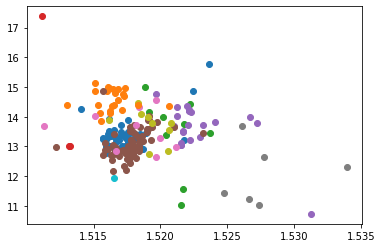

In [ ]:
kmeans = KMeans(n_clusters=17).fit(df_a)
labels = kmeans.predict(df_a)
pred_df = df_a
pred_df["label"] = labels

for i in set(labels):
  plt.scatter(pred_df.loc[pred_df["label"]==i, "a"], pred_df.loc[pred_df["label"]==i, "b"], label=i)

The clustering results will be hard to visualize since it has 9 variables, the scatter plot above is just an example using additive a and b.



---



---



2. A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on the background of oil palm tree physiology.

In [ ]:
import pandas as pd
#load data
df_b = pd.read_csv("./palm_ffb.csv")
df_b

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [ ]:
summary_df = pd.concat([df_b.mean(),df_b.var()],axis=1)
summary_df.columns = ["Mean", "Variance"]
summary_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Mean,Variance
SoilMoisture,527.646923,3.291069e+03
Average_Temp,26.849918,4.243392e-01
Min_Temp,21.379231,4.746816e-01
Max_Temp,33.851538,1.165618e+00
Precipitation,188.980769,6.438010e+03
Working_days,24.753846,1.535838e+00
HA_Harvested,793404.491565,1.186175e+09
FFB_Yield,1.602231,7.938336e-02


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#linear regresssion
lr = LinearRegression()
lr.fit(df_b[["SoilMoisture","Average_Temp","Min_Temp","Max_Temp","Precipitation","Working_days","HA_Harvested"]], df_b["FFB_Yield"])
func_out = str(lr.intercept_)
for i, x in enumerate(lr.coef_):
  func_out += f" + {x}*x{i}"
print("fitted linear regression model:") 
"y = "+func_out

fitted linear regression model:


'y = 2.733091346160263 + -0.001105739308155265*x0 + 0.09132759888744238*x1 + -0.024885382163901265*x2 + -0.012936617968060228*x3 + 0.0013158086444294945*x4 + 0.013975738535818717*x5 + -3.307544019420794e-06*x6'

In [ ]:
import scipy.stats

#regression test
degree_freedom_reg = 8
degree_freedom_err = 121
y_obs = df_b["FFB_Yield"]
y_pred = lr.predict(df_b[["SoilMoisture","Average_Temp","Min_Temp","Max_Temp","Precipitation","Working_days","HA_Harvested"]])
SS = ((y_pred - y_obs.mean())**2).sum()
RSS = ((y_obs - y_pred)**2).sum()
F_reg = (SS/8)/(RSS/121)
F_val = scipy.stats.f.ppf(q=1-0.05, dfn=degree_freedom_reg, dfd=degree_freedom_err)
print(f"F_reg: {F_reg}, F_val: {F_val}")

F_reg: 5.150856647851058, F_val: 2.0157706916643514


Since F_reg is bigger than F_val, the test suggest that we reject the null hypothesis which means that some of the variables/predictors are some of the important factors affecting the FFB Yield of the the oil palm trees.



---



---



3. Feed the following paragraph into your favourite data analytics tool, and answer the following;

In [2]:
paragraph = "As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view."

- a. What is the probability of the word “data” occurring in each line ?

In [9]:
import nltk, string
nltk.download('punkt')
paragraph_tokens = nltk.word_tokenize(paragraph)

# filter out pure punctuations
paragraph_tokens = [x.lower() for x in paragraph_tokens if not all(y in string.punctuation for y in x)]

# probability vs total word count
total_words = len(paragraph_tokens)
data_word_count = len([x for x in paragraph_tokens if x=="data"])
print(f"Probability of the word \"data\" in each word: {round(data_word_count/total_words,6)} ({data_word_count}/{total_words})")

# probability in each line
total_lines = paragraph.split('.')
data_in_lines = [x for x in total_lines if "data" in x.lower()]
print(f"Probability of the word \"data\" in each line: {round(len(data_in_lines)/len(total_lines),6)} ({len(data_in_lines)}/{len(total_lines)})")

Probability of the word "data" in each word: 0.056604 (18/318)
Probability of the word "data" in each line: 0.846154 (11/13)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- b. What is the distribution of distinct word counts across all the lines ?

In [ ]:
from collections import Counter

distinct_distribution = Counter(paragraph_tokens)
print("Distribution of words:")
sorted(distinct_distribution.items(), key=lambda item: item[1], reverse=True)

Distribution of words:


[('data', 18),
 ('to', 11),
 ('the', 11),
 ('a', 10),
 ('analytics', 10),
 ('of', 10),
 ('and', 9),
 ('in', 6),
 ('analysis', 6),
 ('that', 5),
 ('is', 5),
 ('can', 5),
 ('business', 4),
 ('or', 4),
 ('term', 3),
 ('it', 3),
 ('with', 3),
 ('as', 2),
 ('from', 2),
 ('bi', 2),
 ('advanced', 2),
 ("'s", 2),
 ('for', 2),
 ('uses', 2),
 ('while', 2),
 ('has', 2),
 ('view', 2),
 ('more', 2),
 ('on', 2),
 ('exploratory', 2),
 ('eda', 2),
 ('which', 2),
 ('cda', 2),
 ('compared', 2),
 ('work', 2),
 ('be', 2),
 ('qualitative', 2),
 ('predominantly', 1),
 ('refers', 1),
 ('an', 1),
 ('assortment', 1),
 ('applications', 1),
 ('basic', 1),
 ('intelligence', 1),
 ('reporting', 1),
 ('online', 1),
 ('analytical', 1),
 ('processing', 1),
 ('olap', 1),
 ('various', 1),
 ('forms', 1),
 ('sense', 1),
 ('similar', 1),
 ('nature', 1),
 ('another', 1),
 ('umbrella', 1),
 ('approaches', 1),
 ('analyzing', 1),
 ('difference', 1),
 ('latter', 1),
 ('oriented', 1),
 ('broader', 1),
 ('focus', 1),
 ('expansive

- c. What is the probability of the word “analytics” occurring after the word “data” ?

In [ ]:
total_data = 0
total_analytics_after_data = 0
for a, b in nltk.bigrams(paragraph_tokens):
  if a == "data":
    total_data += 1
    if b == "analytics":
      total_analytics_after_data += 1
print(f"Probability of the word \"analytics\" appear after the word \"data\": {round(total_analytics_after_data/total_data,6)} ({total_analytics_after_data}/{total_data})")

Probability of the word "analytics" appear after the word "data": 0.333333 (6/18)
